In [1]:
# Parameters
# oda:version "v0.1.7.dev6"
datasource = "rt"
gcn_number = 0
name = "S230527c"
t0_utc="2023-06-27T01:53:37.000"
ra = 316.05 
dec = 15.79 
radius = 1.0
event_kind = "LVK"
healpix_url = "https://gracedb.ligo.org/api/superevents/S230627c/files/bayestar.multiorder.fits,1"
force_online_expected = 0

In [2]:
# Not sending messages while doing search hides trial factors. We want to declare what we do in advance to avoid this.
# With high rate of alerts, we need a strategy to pick alerts for free text and structured messages. Will not send GCN Circulars about every event
# Structured
# Continue to distribute independent GRB detection GCN notices
# Will send GCN Counterpart Notices, new GCN notices (need to ), SCIMMA alerts, TNS.
# Send for all events < 1 minute
# Free-text (GCN Circular, ATel, AstroNotes?)
# * Including at least one NS & high-significance
# * Any likely EM counterpart reported (gamma-ray or not) in 
# * High-mass within 500 Mpc
# * If notice finds > 3 sigma counterpart for any event; indicating the trial factor and FAR (will depend on the rate)
# 

# Will announce policy in a GCN circular


setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]


['UNIQ', 'PROBDENSITY', 'DISTMU', 'DISTSIGMA', 'DISTNORM']


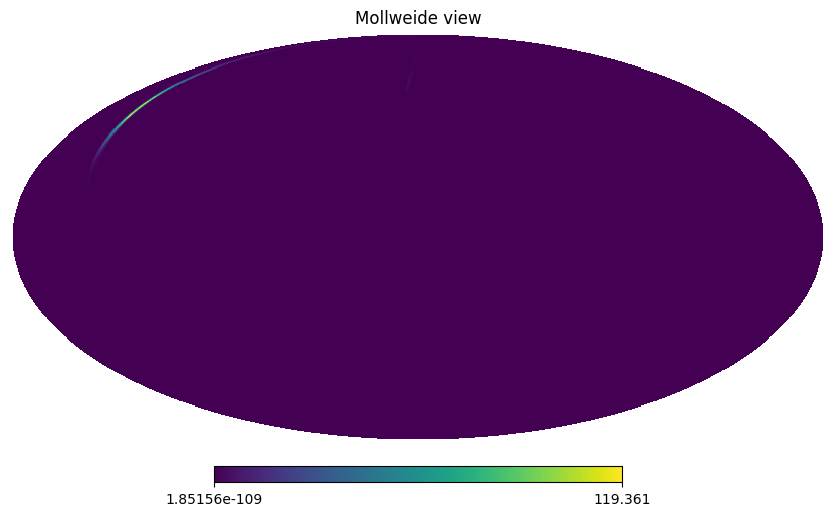

In [3]:
from astropy.table import QTable

skymap = QTable.read(healpix_url)
skymap

import ligo.skymap.moc
import healpy

print(skymap.colnames)

try:
    skymap_flat = ligo.skymap.moc.rasterize(skymap, order=8)['PROBDENSITY']

    healpy.write_map('skymap.fits', skymap_flat, nest=True, overwrite=True)
    healpy.mollview(skymap_flat, nest=True)
except:
    skymap_flat = skymap['PROB']

healpix_url = 'skymap.fits'
healpy.write_map(healpix_url, skymap_flat, nest=True, overwrite=True)


In [4]:
import hashlib

key = hashlib.md5(("%.15lg %.15lg %.5lg %s"%(ra,dec,radius,healpix_url)).encode()).hexdigest()

name=name.replace("AUTO",
                t0_utc[2:4]+t0_utc[5:7]+t0_utc[8:10]+"."+
                (t0_utc[11:13] + t0_utc[14:16]) + t0_utc[17:].replace(".","")+"-"+key[:4])

name

'S230527c'

In [5]:
import sys
import os

sys.path.append(os.environ['HOME']+"/work/integral-visibility")
import integralvisibility

import healpy
# sys.path.append(os.environ['HOME']+"/work/integral/followup/integral-counterpart")

import astropy.io.fits as pyfits
import astropy

import integralclient as ic

import dataanalysis as da
da.printhook.global_permissive_output=False

from astropy.coordinates import SkyCoord
from astropy import units as u

import json

import pandas as pd
draft_dir=os.environ['PWD']
analysis_dir=draft_dir

import os
os.environ['INTEGRAL_DDCACHE_ROOT']="/data/ddcache/"

import counterpart


import dataanalysis.core as da
import dataanalysis.context as ddcontext

failed to get AUTH with env due to: 'K8S_SECRET_INTEGRAL_CLIENT_SECRET'
failed to get AUTH with homefile due to: [Errno 2] No such file or directory: '/home/savchenk/.secret-client-user'


In [6]:
loc_parameters=dict(
            ra=ra,
            dec=dec,            
            dra_p90=(-radius,radius),
            ddec_p90=(-radius,radius),
        )

print("loc_parameters", loc_parameters)

loc_parameters {'ra': 316.05, 'dec': 15.79, 'dra_p90': (-1.0, 1.0), 'ddec_p90': (-1.0, 1.0)}


In [7]:
import imp

da.reset()
imp.reload(counterpart)
imp.reload(counterpart.workflows)

print("counterpart file", counterpart.__file__)

import shutil
shutil.copy(counterpart.__file__, "/tmp/counterpart.py")

counterpart.DataSource.datasource = datasource 

print(counterpart.DataSource().get_version())

if force_online_expected > 0:
    counterpart.DetectONExpected.force_online_expected = True

class OperationStatus(counterpart.OperationStatus):
    version="v2"    
    
    def main(self):
        self.ibis_on=True
        self.spi_on=True

def define_event():
    class Event(counterpart.Event):
        event_name=name
        event_origin=event_kind
        healpix_url=healpix_url.replace("\"","")
        loc_parameters = loc_parameters

        cached=True

        def setup(self):    

            self.gcn=dict(number=gcn_number)

            
            self.event_time=dict(
                utc=t0_utc,
            )
    return Event
        

ICE=define_event()().get()
ICE.promote()

ICE.loc_map

ICE.store_cache(ICE._da_locally_complete)

#counterpart.Event(use_event_kind=IceCubeEvent).promote()

ICE.describe_loc_regions()

#ICE.plot_map()


#######




#if len(sens.get_exceptions()) == 0:
#    sens.plot_fancy()




DataSource.v0.rt
1687899760.7093196 top 113297/139718363305792 object requesting cache for [Event.v0.S230527c.unknown.loc-hp-52e7f7dc;NoneInTheInput]  requested by +Event.v0.S230527c.unknown.loc-hp-52e7f7dc direct
1687899760.709433 top 113297/139718363305792 cached, proceeding to restore
1687899760.7094631 top 113297/139718363305792 searching for cache starting from [CacheCounterparts of size 0 at /data/ddcache/]
Rev in hashe: None
[CacheCounterparts of size 0 at /data/ddcache/] cached path: /data/ddcache//byevent/S230527c.unknown.loc-hp-52e7f7dc/any/741e1753/
1687899760.7095518 top 113297/139718363305792 cache [CacheCounterparts of size 0 at /data/ddcache/] did not find, will restore_from_parent
1687899760.7095811 top 113297/139718363305792 cache [CacheCounterparts of size 0 at /data/ddcache/] returns None
1687899760.7097902 top 113297/139718363305792 object requesting cache for [Event.v0.S230527c.unknown.loc-hp-52e7f7dc;NoneInTheInput]  requested by +Event.v0.S230527c.unknown.loc-hp-

In [8]:
ICE.loc_parameters

{'ra': 160.65610859728508, 'dec': 48.727587100708334}

In [24]:
# from nb2workflow import nbadapter as nba

# nba.nbrun("integralallsky.ipynb", dict(t0_utc=t0_utc, rt=1))

In [25]:
counterpart.__file__

'/home/savchenk/integral_lvk/workflows/counterpart.py'

In [9]:
class CountLimits(counterpart.CountLimits):
    cached=False
    
    
cl = CountLimits().get()

1687899797.8789642 top 113297/139718363305792 object requesting cache for [CountLimits.v2.2_span_300;NoneInTheInput]  requested by +CountLimits.v2.2_span_300 direct
1687899797.8797343 top 113297/139718363305792 object requesting cache for [SourceAssumptions.v2;NoneInTheInput]  requested by +SourceAssumptions.v2 input_of +CountLimits.v2.2_span_300 output_required_by_parent +CountLimits.v2.2_span_300 direct
1687899797.880058 top 113297/139718363305792 object requesting cache for [SourceAssumptions.v2;NoneInTheInput]  requested by +SourceAssumptions.v2 output_required_by_parent +SourceAssumptions.v2 input_of +CountLimits.v2.2_span_300 output_required_by_parent +CountLimits.v2.2_span_300 direct
1687899797.8811038 top 113297/139718363305792 node [SourceAssumptions.v2;NoneInTheInput] main DONE!
1687899797.881936 top 113297/139718363305792 object storing in cache: [SourceAssumptions.v2;NoneInTheInput], cache [CacheCounterparts of size 0 at /data/ddcache/]
1687899797.8822715 top 113297/1397183

1687899798.1416817 top 113297/139718363305792 node [OperationStatus.v2;NoneInTheInput] main DONE!
1687899798.1419566 top 113297/139718363305792 object storing in cache: [OperationStatus.v2;NoneInTheInput], cache [CacheCounterparts of size 0 at /data/ddcache/]
1687899798.1420772 top 113297/139718363305792 first non-transient cache [CacheCounterparts of size 0 at /data/ddcache/] storing [OperationStatus.v2;NoneInTheInput]
1687899798.14211 top 113297/139718363305792 [CacheCounterparts of size 0 at /data/ddcache/] storing: ('analysis', ('analysis', None, 'Event.v0.S230527c.2023-06-27T015337.000.loc-hp-52e7f7dc'), 'OperationStatus.v2')
Rev in hashe: None
[CacheCounterparts of size 0 at /data/ddcache/] cached path: /data/ddcache//byevent/S230527c.2023-06-27T015337.000.loc-hp-52e7f7dc/OperationStatus.v2/6f50566f/
1687899798.1437569 top 113297/139718363305792 assembling portable identity
 now assumptions 0 / 0
Rev in hashe: None
[CacheCounterparts of size 0 at /data/ddcache/] cached path: /dat

Cloning into '/tmp/nb2w-nu8_x2oj'...


2023-06-27T21:03:18.4 [terpart.py: 617[CountLimits.v2.2_sp; run_workfl: found as [URIipynbFunction][(*, RA=293.732, Dec=21.8967222, tstart_rel_mseconds=300.0, tstop_rel_seconds=300.0, t0_utc='2023-06-27T01:53:37.000', required_completeness=0.6, mode='scw', global_snr_threshold=3.0, negative_excesses=0)]:[file:///home/savchenk/integral_lvk/workflows/integralallsky.ipynb@]
2023-06-27T21:03:18.4 [terpart.py: 619[CountLimits.v2.2_sp; run_workfl: found parameters applied as [URIPythonFunction][()][prov: [('partial', ('args', ()), ('kwargs', {'t0_utc': '2023-06-27T01:53:37.000'}), ([URIipynbFunction][(*, RA=293.732, Dec=21.8967222, tstart_rel_mseconds=300.0, tstop_rel_seconds=300.0, t0_utc='2023-06-27T01:53:37.000', required_completeness=0.6, mode='scw', global_snr_threshold=3.0, negative_excesses=0)]:[file:///home/savchenk/integral_lvk/workflows/integralallsky.ipynb@], None))]]:[file:///tmp/urivalue//d2612891//home/savchenk/integral_lvk/workflows/integralallsky]
2023-06-27T21:03:18.5 [urifu

done.

<>:51: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:78: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:105: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:132: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:159: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:186: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:213: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:24: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:51: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:78: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:105: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:132: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:159: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:186: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:213: SyntaxWarning: "is" with a literal. Did you mean "=="?

  if 1048576 is None or len(content) < 1048576:

  i

2023-06-27T21:04:55.0 [terpart.py: 688[CountLimits.v2.2_sp;    get_ias: got ias data:
2023-06-27T21:04:55.0 [terpart.py: 690[CountLimits.v2.2_sp;    get_ias: acs_lc_png 10 'ACS_lc.png'
2023-06-27T21:04:55.0 [terpart.py: 690[CountLimits.v2.2_sp;    get_ias: acs_lc_png_content 108052 'iVBORw0KGgoAAAANSUhEUgAAAyAAAAJYCAYAAACadoJwAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy89olMNAAAACXBIWXMAAA9hAAAPYQGoP6dpAAEAAElEQVR4nOzdd5hU5fnw8e8pU7Y3trB0sQCKDSNi7BLQYNTYja8aeyMRTezCT8USu2A3sSv2aFQURBAUQZAu3UKHpS27y9Zp5/1j2jlTdmdhd2YW7s91ebnMnDnnOf25n6o
2023-06-27T21:04:55.0 [terpart.py: 690[CountLimits.v2.2_sp;    get_ias: acs_rt_lc_png 10 'ACS_lc.png'
2023-06-27T21:04:55.0 [terpart.py: 690[CountLimits.v2.2_sp;    get_ias: acs_rt_lc_png_content 108052 'iVBORw0KGgoAAAANSUhEUgAAAyAAAAJYCAYAAACadoJwAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy89olMNAAAACXBIWXMAAA9hAAAPYQGoP6dpAAEAAElEQVR4nOzdd5hU5fnw8e8pU7Y3trB0sQCKDSNi7BLQ

2023-06-27T21:04:55.2 [terpart.py: 617[CountLimits.v2.2_sp; run_workfl: found as [URIipynbFunction][(*, RA=293.732, Dec=21.8967222, tstart_rel_mseconds=300.0, tstop_rel_seconds=300.0, t0_utc='2023-06-27T01:53:37.000', required_completeness=0.6, mode='scw', global_snr_threshold=3.0, negative_excesses=0)]:[file:///home/savchenk/integral_lvk/workflows/integralallsky.ipynb@]
2023-06-27T21:04:55.2 [terpart.py: 619[CountLimits.v2.2_sp; run_workfl: found parameters applied as [URIPythonFunction][()][prov: [('partial', ('args', ()), ('kwargs', {'t0_utc': '2023-06-27T01:53:37.000'}), ([URIipynbFunction][(*, RA=293.732, Dec=21.8967222, tstart_rel_mseconds=300.0, tstop_rel_seconds=300.0, t0_utc='2023-06-27T01:53:37.000', required_completeness=0.6, mode='scw', global_snr_threshold=3.0, negative_excesses=0)]:[file:///home/savchenk/integral_lvk/workflows/integralallsky.ipynb@], None))]]:[file:///tmp/urivalue//d2612891//home/savchenk/integral_lvk/workflows/integralallsky]
2023-06-27T21:04:55.4 [terpa

2023-06-27T21:04:55.5 [terpart.py: 690[CountLimits.v2.2_sp;    get_ias: summary 1 {'ACS': {'best': {'localfar_s': 3.235939701409979, 'scale': 0.7000000000000001, 'summary_scale': {'excesses': [{'FAP': 0.728068976219474, 'rate': 85579.99999999999, 'rate_err': 349.65288910166726, 'rate_overbkg': 1909.9499332443374, 'rel_s_scale': 277.37947143447985, 'snr': 4.682586184914816}], 'exc
2023-06-27T21:04:55.5 [terpart.py: 690[CountLimits.v2.2_sp;    get_ias: reportable_excesses 46 [{'excess': {'FAP': 0.009432471324841697, 'rate': 84438.74999999999, 'rate_err': 187.57081995875583, 'rate_overbkg': 768.8688085675967, 'rel_s_scale': -0.22075170199968852, 'snr': 3.371209972036112}, 'offset': 20, 'scale': 2.4000000000000004}, {'excess': {'FAP': 0.34866486497181604, 'rate': 85614.99
2023-06-27T21:04:55.5 [terpart.py: 690[CountLimits.v2.2_sp;    get_ias: excvar_summary 4 {'hf_200ms': [1.1405732028596527, 1.1573560141817287, 1.1402113825496039], 'lf_10s': [1.2694651481742751, 1.1506360094826322, 1.2263

2023-06-27T21:04:55.7 [terpart.py: 617[CountLimits.v2.2_sp; run_workfl: found as [URIipynbFunction][(*, RA=293.732, Dec=21.8967222, tstart_rel_mseconds=300.0, tstop_rel_seconds=300.0, t0_utc='2023-06-27T01:53:37.000', required_completeness=0.6, mode='scw', global_snr_threshold=3.0, negative_excesses=0)]:[file:///home/savchenk/integral_lvk/workflows/integralallsky.ipynb@]
2023-06-27T21:04:55.7 [terpart.py: 619[CountLimits.v2.2_sp; run_workfl: found parameters applied as [URIPythonFunction][()][prov: [('partial', ('args', ()), ('kwargs', {'t0_utc': '2023-06-27T01:53:37.000'}), ([URIipynbFunction][(*, RA=293.732, Dec=21.8967222, tstart_rel_mseconds=300.0, tstop_rel_seconds=300.0, t0_utc='2023-06-27T01:53:37.000', required_completeness=0.6, mode='scw', global_snr_threshold=3.0, negative_excesses=0)]:[file:///home/savchenk/integral_lvk/workflows/integralallsky.ipynb@], None))]]:[file:///tmp/urivalue//d2612891//home/savchenk/integral_lvk/workflows/integralallsky]
2023-06-27T21:04:55.8 [terpa

2023-06-27T21:04:56.1 [terpart.py: 617[CountLimits.v2.2_sp; run_workfl: found as [URIipynbFunction][(*, RA=293.732, Dec=21.8967222, tstart_rel_mseconds=300.0, tstop_rel_seconds=300.0, t0_utc='2023-06-27T01:53:37.000', required_completeness=0.6, mode='scw', global_snr_threshold=3.0, negative_excesses=0)]:[file:///home/savchenk/integral_lvk/workflows/integralallsky.ipynb@]
2023-06-27T21:04:56.1 [terpart.py: 619[CountLimits.v2.2_sp; run_workfl: found parameters applied as [URIPythonFunction][()][prov: [('partial', ('args', ()), ('kwargs', {'t0_utc': '2023-06-27T01:53:37.000'}), ([URIipynbFunction][(*, RA=293.732, Dec=21.8967222, tstart_rel_mseconds=300.0, tstop_rel_seconds=300.0, t0_utc='2023-06-27T01:53:37.000', required_completeness=0.6, mode='scw', global_snr_threshold=3.0, negative_excesses=0)]:[file:///home/savchenk/integral_lvk/workflows/integralallsky.ipynb@], None))]]:[file:///tmp/urivalue//d2612891//home/savchenk/integral_lvk/workflows/integralallsky]
2023-06-27T21:04:56.1 [terpa

2023-06-27T21:04:56.4 [terpart.py: 617[CountLimits.v2.2_sp; run_workfl: found as [URIipynbFunction][(*, RA=293.732, Dec=21.8967222, tstart_rel_mseconds=300.0, tstop_rel_seconds=300.0, t0_utc='2023-06-27T01:53:37.000', required_completeness=0.6, mode='scw', global_snr_threshold=3.0, negative_excesses=0)]:[file:///home/savchenk/integral_lvk/workflows/integralallsky.ipynb@]
2023-06-27T21:04:56.4 [terpart.py: 619[CountLimits.v2.2_sp; run_workfl: found parameters applied as [URIPythonFunction][()][prov: [('partial', ('args', ()), ('kwargs', {'t0_utc': '2023-06-27T01:53:37.000'}), ([URIipynbFunction][(*, RA=293.732, Dec=21.8967222, tstart_rel_mseconds=300.0, tstop_rel_seconds=300.0, t0_utc='2023-06-27T01:53:37.000', required_completeness=0.6, mode='scw', global_snr_threshold=3.0, negative_excesses=0)]:[file:///home/savchenk/integral_lvk/workflows/integralallsky.ipynb@], None))]]:[file:///tmp/urivalue//d2612891//home/savchenk/integral_lvk/workflows/integralallsky]
2023-06-27T21:04:56.5 [terpa

In [14]:
cl.excess_list[:5]

[{'excess': {'FAP': 0.009432471324841697,
   'rate': 84438.74999999999,
   'rate_err': 187.57081995875583,
   'rate_overbkg': 768.8688085675967,
   'rel_s_scale': -0.22075170199968852,
   'snr': 3.371209972036112},
  'offset': 20,
  'scale': 2.4000000000000004},
 {'excess': {'FAP': 0.34866486497181604,
   'rate': 85614.99999999999,
   'rate_err': 462.6418701328274,
   'rate_overbkg': 1945.2168112074723,
   'rel_s_scale': -24.570770527498098,
   'snr': 3.6144474489957106},
  'offset': 1,
  'scale': 0.4000000000000001},
 {'excess': {'FAP': 0.6434668023619585,
   'rate': 84807.99999999999,
   'rate_err': 291.21813130366723,
   'rate_overbkg': 1138.0651085141872,
   'rel_s_scale': -56.37079669861123,
   'snr': 3.290626867566607},
  'offset': 3,
  'scale': 1.0000000000000002},
 {'excess': {'FAP': 0.728068976219474,
   'rate': 85579.99999999999,
   'rate_err': 349.65288910166726,
   'rate_overbkg': 1909.9499332443374,
   'rel_s_scale': 277.37947143447985,
   'snr': 4.682586184914816},
  'off

In [15]:
cl.input_datasource.datasource

'rt'

In [16]:
cl.get_count_limit('ACS', 1)

found as [URIipynbFunction][(*, RA=293.732, Dec=21.8967222, tstart_rel_mseconds=300.0, tstop_rel_seconds=300.0, t0_utc='2023-06-27T01:53:37.000', required_completeness=0.6, mode='scw', global_snr_threshold=3.0, negative_excesses=0)]:[file:///home/savchenk/integral_lvk/workflows/integralallsky.ipynb@]
found parameters applied as [URIPythonFunction][()][prov: [('partial', ('args', ()), ('kwargs', {'t0_utc': '2023-06-27T01:53:37.000'}), ([URIipynbFunction][(*, RA=293.732, Dec=21.8967222, tstart_rel_mseconds=300.0, tstop_rel_seconds=300.0, t0_utc='2023-06-27T01:53:37.000', required_completeness=0.6, mode='scw', global_snr_threshold=3.0, negative_excesses=0)]:[file:///home/savchenk/integral_lvk/workflows/integralallsky.ipynb@], None))]]:[file:///tmp/urivalue//d2612891//home/savchenk/integral_lvk/workflows/integralallsky]
got ias data:
acs_lc_png 10 'ACS_lc.png'
acs_lc_png_content 108052 'iVBORw0KGgoAAAANSUhEUgAAAyAAAAJYCAYAAACadoJwAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMCwgaHR0

1035.179297345534

In [17]:

class Sensitivities(counterpart.Sensitivities):
    minsolarangle=40
    datafile_restore_mode='url_in_object'
    cached=False
    
    
sens=Sensitivities().get()

#if len(sens.get_exceptions()) == 0:
#    sens.plot_fancy()


1687900015.6806848 top 113297/139718363305792 object requesting cache for [Sensitivities.v0;NoneInTheInput]  requested by +Sensitivities.v0 direct
1687900015.690997 top 113297/139718363305792 object requesting cache for [SensitivityMaps.v0;NoneInTheInput]  requested by +SensitivityMaps.v0 input_of +Sensitivities.v0 output_required_by_parent +Sensitivities.v0 direct
1687900015.6915205 top 113297/139718363305792 object requesting cache for [SourceAssumptions.v2;NoneInTheInput]  requested by +SourceAssumptions.v2 input_of +SensitivityMaps.v0 output_required_by_parent +SensitivityMaps.v0 input_of +Sensitivities.v0 output_required_by_parent +Sensitivities.v0 direct
1687900015.6915796 top 113297/139718363305792 the object has not record of restore config
1687900015.6916072 top 113297/139718363305792 ('analysis', None, 'SourceAssumptions.v2')
1687900015.6962032 top 113297/139718363305792 object requesting cache for [CountLimits.v2.2_span_300;NoneInTheInput]  requested by +CountLimits.v2.2_spa

In [19]:
import integralvisibility
sun=integralvisibility.ephem.Sun("2018-09-11")
#sun=ephem.Sun(ijd-ijd02-ephem.Date("2002/01/01"))
sun_coord=SkyCoord(sun.ra,sun.dec,unit=u.rad,representation_type="spherical")
sun_coord.separation(SkyCoord(144.58,-2.13,unit='deg'))

<Angle 25.4868563 deg>

In [20]:
if len(sens.get_exceptions()) == 0:
    bs=counterpart.BackgroundStabilityAssertion()
    cl=bs.input_countlimits().get()

    for k,v in cl.hk.items():
        for kk,vv in v.items():
            print(k,kk,vv['excvar'])

1687900096.9402325 top 113297/139718363305792 object requesting cache for [CountLimits.v2.2_span_300;NoneInTheInput]  requested by +CountLimits.v2.2_span_300 direct
1687900096.9403245 top 113297/139718363305792 the object has not record of restore config
1687900096.9403546 top 113297/139718363305792 ('analysis', ('list', ('analysis', None, 'SourceAssumptions.v2'), ('analysis', None, 'DataSource.v0.rt'), ('analysis', ('analysis', None, 'DataSource.v0.rt'), 'InstrumentSelection.v1'), ('analysis', ('list', ('analysis', None, 'DataSource.v0.rt'), ('analysis', ('analysis', None, 'Event.v0.S230527c.2023-06-27T015337.000.loc-hp-52e7f7dc'), 'DetectONExpected.v0'), ('analysis', None, 'Event.v0.S230527c.2023-06-27T015337.000.loc-hp-52e7f7dc')), 'DetectNoData.v0'), ('analysis', ('analysis', None, 'Event.v0.S230527c.2023-06-27T015337.000.loc-hp-52e7f7dc'), 'OperationStatus.v2'), ('analysis', None, 'Event.v0.S230527c.2023-06-27T015337.000.loc-hp-52e7f7dc')), 'CountLimits.v2.2_span_300')
ACS 1 1.192

In [21]:
import datetime
now_utc=datetime.datetime.strftime(datetime.datetime.now(),"%Y-%m-%dT%H:%M:%S")
now_ijd=float(ic.converttime("UTC",now_utc,"IJD"))

In [22]:

ic_ijd=float(ic.converttime("UTC", ICE.event_time['utc'], "IJD"))


In [23]:
da.byname('Sensitivities').get()._da_locally_complete

1687900102.9011931 top 113297/139718363305792 object requesting cache for [Sensitivities.v0;NoneInTheInput]  requested by +Sensitivities.v0 direct
1687900102.9012778 top 113297/139718363305792 the object has not record of restore config
1687900102.9013019 top 113297/139718363305792 ('analysis', ('analysis', ('list', ('analysis', None, 'SourceAssumptions.v2'), ('analysis', ('list', ('analysis', None, 'SourceAssumptions.v2'), ('analysis', None, 'DataSource.v0.rt'), ('analysis', ('analysis', None, 'DataSource.v0.rt'), 'InstrumentSelection.v1'), ('analysis', ('list', ('analysis', None, 'DataSource.v0.rt'), ('analysis', ('analysis', None, 'Event.v0.S230527c.2023-06-27T015337.000.loc-hp-52e7f7dc'), 'DetectONExpected.v0'), ('analysis', None, 'Event.v0.S230527c.2023-06-27T015337.000.loc-hp-52e7f7dc')), 'DetectNoData.v0'), ('analysis', ('analysis', None, 'Event.v0.S230527c.2023-06-27T015337.000.loc-hp-52e7f7dc'), 'OperationStatus.v2'), ('analysis', None, 'Event.v0.S230527c.2023-06-27T015337.000

('analysis',
 ('analysis',
  ('list',
   ('analysis', None, 'SourceAssumptions.v2'),
   ('analysis',
    ('list',
     ('analysis', None, 'SourceAssumptions.v2'),
     ('analysis', None, 'DataSource.v0.rt'),
     ('analysis',
      ('analysis', None, 'DataSource.v0.rt'),
      'InstrumentSelection.v1'),
     ('analysis',
      ('list',
       ('analysis', None, 'DataSource.v0.rt'),
       ('analysis',
        ('analysis',
         None,
         'Event.v0.S230527c.2023-06-27T015337.000.loc-hp-52e7f7dc'),
        'DetectONExpected.v0'),
       ('analysis',
        None,
        'Event.v0.S230527c.2023-06-27T015337.000.loc-hp-52e7f7dc')),
      'DetectNoData.v0'),
     ('analysis',
      ('analysis',
       None,
       'Event.v0.S230527c.2023-06-27T015337.000.loc-hp-52e7f7dc'),
      'OperationStatus.v2'),
     ('analysis',
      None,
      'Event.v0.S230527c.2023-06-27T015337.000.loc-hp-52e7f7dc')),
    'CountLimits.v2.2_span_300'),
   ('analysis',
    ('analysis', None, 'DataSource.v

In [24]:
#da.reset()

class FinalComment(counterpart.DataAnalysis):
    input_ic=ICE

    read_caches=[]
    cached=True

    def main(self):
        self.comment=""
        
FinalComment().get()

1687900106.2617729 top 113297/139718363305792 object requesting cache for [FinalComment.v0;NoneInTheInput]  requested by +FinalComment.v0 direct
1687900106.261915 top 113297/139718363305792 cached, proceeding to restore
1687900106.261959 top 113297/139718363305792 searching for cache starting from [CacheCounterparts of size 0 at /data/ddcache/]
1687900106.262018 top 113297/139718363305792 cache [CacheCounterparts of size 0 at /data/ddcache/] not approved_read_cache, will restore_from_parent
1687900106.2620623 top 113297/139718363305792 cache [CacheCounterparts of size 0 at /data/ddcache/] returns None
1687900106.2625911 top 113297/139718363305792 object requesting cache for [Event.v0.S230527c.2023-06-27T015337.000.loc-hp-52e7f7dc;NoneInTheInput]  requested by +Event.v0.S230527c.2023-06-27T015337.000.loc-hp-52e7f7dc input_of +FinalComment.v0 output_required_by_parent +FinalComment.v0 direct
1687900106.2626393 top 113297/139718363305792 the object has not record of restore config
1687900

[FinalComment.v0;NoneInTheInput]

In [25]:
data={}

data['datesource'] = datasource


define_event()().get()

#for obj in [ic, counterpart.Sensitivities, counterpart.ScSystem, counterpart.OperationsReport, counterpart.CountLimits, counterpart.BackgroundStabilityAssertion, counterpart.OrientationComment, counterpart.FinalComment]:
for cls in [counterpart.Event, counterpart.FinalComment, counterpart.Sensitivities, counterpart.ScSystem, counterpart.OperationsReport, counterpart.CountLimits, counterpart.BackgroundStabilityAssertion, counterpart.OrientationComment, counterpart.FinalComment, counterpart.DetectionSummary]:
    obj = da.byname(cls().get_factory_name()).get()
        
    obj.datafile_restore_mode = 'url_in_object'
    data[obj.__class__.__name__]=obj.export_data(include_class_attributes=True)

1687900108.61036 top 113297/139718363305792 object requesting cache for [Event.v0.S230527c.unknown.loc-hp-52e7f7dc;NoneInTheInput]  requested by +Event.v0.S230527c.unknown.loc-hp-52e7f7dc direct
1687900108.6107461 top 113297/139718363305792 ('analysis', None, 'Event.v0.S230527c.unknown.loc-hp-52e7f7dc')
1687900108.6126986 top 113297/139718363305792 object requesting cache for [Event.v0.S230527c.2023-06-27T015337.000.loc-hp-52e7f7dc;NoneInTheInput]  requested by +Event.v0.S230527c.2023-06-27T015337.000.loc-hp-52e7f7dc direct
1687900108.6131144 top 113297/139718363305792 object requesting cache for [Event.v0.S230527c.2023-06-27T015337.000.loc-hp-52e7f7dc;NoneInTheInput]  requested by +Event.v0.S230527c.2023-06-27T015337.000.loc-hp-52e7f7dc output_required_by_parent +Event.v0.S230527c.2023-06-27T015337.000.loc-hp-52e7f7dc direct
2023-06-27T21:08:28.6 [terpart.py: 324[Event.v0.S230527c.2;    loc_map: healpix url NOT empty: peak at {'ra': 160.65610859728508, 'dec': 48.727587100708334}
2023-

In [26]:
data['DetectionSummary'].get('txt'),data['DetectionSummary'].get('detection_decision',None)

('', False)

In [27]:
data['DetectionSummary']

{'default_log_level': '',
 'txt': '',
 'excess_list': [{'excess': {'FAP': 0.009432471324841697,
    'rate': 84438.74999999999,
    'rate_err': 187.57081995875583,
    'rate_overbkg': 768.8688085675967,
    'rel_s_scale': -0.22075170199968852,
    'snr': 3.371209972036112,
    'flux_min': 1.334005613779999e-07,
    'flux_max': 1.421220170914457e-07,
    'flux': 1.3776128923472278e-07,
    'flux_err_loc': 3.2785131275012034e-08,
    'flux_err': 3.467164096524939e-08,
    'flux_scaled_min': 1.3340056137799992,
    'flux_scaled_max': 1.421220170914457,
    'flux_scaled': 1.377612892347228,
    'flux_scaled_err_loc': 0.32785131275012036,
    'flux_scaled_err': 0.3467164096524939,
    'FAP_sigma': 2.3481890672037293},
   'offset': 20,
   'scale': 2.4000000000000004},
  {'excess': {'FAP': 0.34866486497181604,
    'rate': 85614.99999999999,
    'rate_err': 462.6418701328274,
    'rate_overbkg': 1945.2168112074723,
    'rel_s_scale': -24.570770527498098,
    'snr': 3.6144474489957106,
    'flux

In [28]:
#data['integral']
revnum = ic.converttime("UTC", t0_utc, "REVNUM")


if False:
    

    data['integral']=dict(orbit_before=revnum,
                          orbit_after="%.4i"%(int(revnum)+1),
                          first_data_utc=""
                         )

    print("data",data['integral'])

    try:
        first_scw_utc = ic.converttime("SCWID", data['integral']['orbit_after']+"00010010", "UTC").split()[0]

        import time

        if False:
            while True:
                try:
                    firstacs = ic.get_hk(utc=first_scw_utc,target="ACS",span=5000)
                    break
                except counterpart.ic.ServiceException as e:
                    print(e)
                    time.sleep(1)


        print(first_scw_utc)
        first_scw_ijd = ic.converttime("UTC",first_scw_utc,"IJD")

        import isdcclient
        isc = isdcclient.ISDCClient()

        acs = isc.genlc("ACS",first_scw_utc,"5000",format='numpy')
        first_data_ijd = acs[:,0][acs[:,2]>0][0]
        first_data_utc = ic.converttime("IJD",first_data_ijd,"UTC")

        before_rev_ijd = float(ic.converttime("REVNUM",revnum,"IJD").split()[2])

        acs = isc.genlc("ACS","%.20lg"%(before_rev_ijd-5./24.),"%.20lg"%(4.5*3600),format='numpy')



        last_data_ijd = acs[:,0][acs[:,2]>0][-1]
        last_data_utc = ic.converttime("IJD",last_data_ijd,"UTC")

        print("last data",last_data_utc)

        last_data_ijd,last_data_utc


        data['integral']['last_data_utc'] = last_data_utc
        data['integral']['last_data_ijd'] = last_data_ijd

        data['integral']['first_data_utc'] = first_data_utc
        data['integral']['first_data_ijd'] = first_data_ijd
    except Exception as e:
        print("not yet",e)

In [29]:
import requests

prophecy_summary = requests.get(f"https://www.astro.unige.ch/mmoda/dispatch-data/gw/integralhk/api/v1.0/rtlc/{t0_utc}/2?json&prophecy").json()['prophecy']

In [30]:
if 'expected_data_status' not in prophecy_summary[1]:
    data['integral']=dict(orbit_before=revnum,
                              orbit_after="%.4i"%(int(revnum)+1),
                              last_data_utc="UNKNOWN",
                              first_data_utc="UNKNOWN",
                             )
elif prophecy_summary[1]['expected_data_status'] == "OFFLINE":
    # or \
    # d['data']['rtstatus'] == "OFFLINE":

    data['integral']=dict(orbit_before=revnum,
                              orbit_after="%.4i"%(int(revnum)+1),
                              last_data_utc=str(prophecy_summary[1]['last_data_utc']),
                              first_data_utc=str(prophecy_summary[1]['next_data_utc']),
                             )

    try:
        data['integral']['first_data_ijd']=ic.converttime("UTC", prophecy_summary[1]['next_data_utc'], 'IJD')
        data['integral']['last_data_ijd']=ic.converttime("UTC", prophecy_summary[1]['last_data_utc'], 'IJD')
    except Exception as e:
        print("unable to get prophecy ijd!", prophecy_summary[1]['next_data_utc'], prophecy_summary[1]['last_data_utc'])
        data['integral']['first_data_ijd'] = "UNKNOWN"
        data['integral']['last_data_ijd'] = "UNKNOWN"
    

In [31]:
#da.byname("OrientationComment").get().export_data()

da.byname('ScSystem')._da_locally_complete

('analysis',
 ('analysis', None, 'Event.v0.S230527c.2023-06-27T015337.000.loc-hp-52e7f7dc'),
 'ScSystem.v2')

In [32]:
ev=da.byname('Event')
final_peak = ev.peak()
print(final_peak,ev.loc_parameters)

[160.65610859728508, 48.727587100708334] {'ra': 160.65610859728508, 'dec': 48.727587100708334}


In [33]:
import requests
data['shift'] = dict(fullnames = requests.get("http://cdcihn/transients/dashboard/current-shift").text)

In [34]:
data['event_class'] = 'LIGO/Virgo'
data['datasource'] = datasource

In [35]:
try:
    data['gcn_repo_version'] = open("/repo-version").read().strip()
except:
    data['gcn_repo_version'] = "local"

In [36]:
from astropy import units as u
from astropy import constants as const


In [37]:
import numpy as np

if not hasattr(ev, 'map_header'):
    data['distance'] = None
else:
    distance_mean = ev.map_header.get('DISTMEAN'),ev.map_header.get('DISTSTD')

    if ev.map_header.get('DISTMEAN') is None or ev.map_header.get('DISTSTD') is None or data['Sensitivities'].get('summary') is None:
        data['distance'] = None
    else:
        data['distance']=dict(
            mean_Mpc = ev.map_header.get('DISTMEAN'),
            std_Mpc = ev.map_header.get('DISTSTD'),     
        )

        data['at_distance']=dict(
            at_mean=dict(),
        )

        for k,d in data['Sensitivities']['summary'].items():
            data['at_distance']['at_mean'][k]=dict()
            for r,rd in d.items():            
                data['at_distance']['at_mean'][k][r]=rd*float(data['distance']['mean_Mpc']*u.Mpc/u.cm)**2*4*np.pi
                print(k,r,rd,data['at_distance']['at_mean'][k][r])

data['distance']

In [38]:
sens_map_soft_png=getattr(sens,'sens_map_soft_png','none')
sens_map_hard_png=getattr(sens,'sens_map_hard_png','none')

In [39]:
try:
    import odahubz
    data['links'] = [odahubz.publish(
        title="INTEGRAL observation of "+name,
        fn_png=sens_map_hard_png,
        provenance="gcn pipeline",
        keywords=["INTEGRAL", name, "GCN", "sensitiviy", "transient"],
    )]
except Exception as e:
    print("failed to publish", e)
    data['links'] = []

failed to publish No module named 'odahubz'


In [40]:
import ddpaper

from ddpaper.render import  render_draft
from ddpaper.render import get_latex_jinja_env


if len(sens.get_exceptions()) == 0:

    gcn_text = render_draft(get_latex_jinja_env(),
                 open("/home/savchenk/integral_lvk/workflows/upper_limit.txt").read(),
                 data
                )
else:
    print("found exceptions:",sens.get_exceptions())
    gcn_text = render_draft(get_latex_jinja_env(),
                 open("/home/savchenk/integral_lvk/workflows/inactive.txt").read(),
                 data
                )

print(gcn_text)


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%% generated by template.py, please do not edit directly
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


    


LIGO/Virgo S230527c: No counterpart candidates in INTEGRAL SPI-ACS prompt observation

NOWRAP 404 page not found

NOWRAP V. Savchenko, C. Ferrigno (ISDC/UniGE, Switzerland)
NOWRAP J. Rodi (IAPS-Roma, Italy)
NOWRAP A. Coleiro (APC, France)
NOWRAP S. Mereghetti (INAF IASF-Milano, Italy)

on behalf of the INTEGRAL multi-messenger collaboration:
https://www.astro.unige.ch/cdci/integral-multimessenger-collaboration


Using INTEGRAL/SPI-ACS realtime data (following [1]) we have performed a search for a prompt gamma-ray
counterpart of S230527c (GCN 0).

At the time of the event (2023-06-27 01:53:37 UTC,
hereafter T0), INTEGRAL was operating in nominal mode. The peak of the event
localization probability was at an angle of
94 deg with respect to the
spacecraft pointing axis. This orientation implies strongly 

In [41]:
import textwrap

In [42]:
gcn_wrapped_text = ""

long_sep = "%c%c"%(10,10)

for block in gcn_text.split(long_sep):    
    if '%%%%%' in block:
        continue
    
    if 'NOWRAP' in block:
        text = block.replace("NOWRAP ","")
    else:
        text = "\n".join(textwrap.wrap(
            textwrap.dedent(block).strip(),
            70,initial_indent=''))
        
    gcn_wrapped_text += text+long_sep

print(gcn_wrapped_text,"\n")



LIGO/Virgo S230527c: No counterpart candidates in INTEGRAL SPI-ACS
prompt observation

404 page not found

V. Savchenko, C. Ferrigno (ISDC/UniGE, Switzerland)
J. Rodi (IAPS-Roma, Italy)
A. Coleiro (APC, France)
S. Mereghetti (INAF IASF-Milano, Italy)

on behalf of the INTEGRAL multi-messenger collaboration:
https://www.astro.unige.ch/cdci/integral-multimessenger-collaboration

Using INTEGRAL/SPI-ACS realtime data (following [1]) we have performed
a search for a prompt gamma-ray counterpart of S230527c (GCN 0).

At the time of the event (2023-06-27 01:53:37 UTC, hereafter T0),
INTEGRAL was operating in nominal mode. The peak of the event
localization probability was at an angle of 94 deg with respect to the
spacecraft pointing axis. This orientation implies strongly suppressed
(8.9% of optimal) response of ISGRI, strongly suppressed (28% of
optimal) response of IBIS/Veto, and near-optimal (81% of optimal)
response of SPI-ACS.

The background within +/-300 seconds around the event was 

In [ ]:
open("gcn.txt","w").write(gcn_text)
open("gcn_wrapped.txt","w").write(gcn_wrapped_text)

In [ ]:
# fov info
# ibas triggers
# title to what is used
# say what is used
# list counterparts
# luminosity
# strss all-sky

In [ ]:
gcn_html = gcn_wrapped_text.replace("\n","<br>")

In [ ]:
#! < gcn.txt awk '{if (/^NOWRAP/) {gsub("^NOWRAP ",""); print} else {print "WRAP "$$0}}' | fmt --prefix WRAP | awk '{gsub("^WRAP ?","")}1' > gcn_wrapped.txt
#fmt -w 70  gcn.txt > gcn_wrapped.txt

In [ ]:
try:
    data['CountLimits']['rtdata']['acs_rt_lc_png_content']='contracted'
    data['CountLimits']['rtdata']['acs_rt_det_lc_png_content']='contracted'
except Exception as e:
    print(e)

import json
    
try:
    json.dump(data, open("gcndata.json","w"))
except Exception as e:
    json.dump({}, open("gcndata.json","w"))

In [ ]:
gcn_wrapped_txt="gcn_wrapped.txt"
gcn_txt="gcn.txt"
gcn_wrapped_text=gcn_wrapped_text
gcn_text=gcn_text
gcn_html=gcn_html
sens_map_soft_png=sens_map_soft_png
sens_map_hard_png=sens_map_hard_png
gcndata_txt="gcndata.json"
final_peak=final_peak